In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# bin plot

In [31]:
def bin_plot(df, x_label, y_label, n_bins, w_label=None, scale=1, ax=None, **plot_kwargs):
        
        '''
        create a bin plot with your feature (x_label), binned into (num_bin) quantiles 
        (with equal count), on the X-axis, and the corresponding mean of the target
        variable (y_label) along with one standard error around mean on the Y-axis. 
        
        Parameters
        ----------------
        x_label: str
            label of feature x
            
        y_label: str
            label of target
            
        w_label: str
            label of weight if provided
            
        scale: float, default=1
            where to plot the point with the bin = mean(bin) * scale
            
        ax: axes
            ax to plot on, if None, the function will create one
            
        n_bins: int
            number of bins
            
        **plot_kwargs: dict
            keyword and arguments of ax.plot(x, y)
        '''
        
        key = df[x_label].values
        value = df[y_label].values
        if w_label is not None:
            w = df[w_label].values
        
            
        sorted_idx = np.argsort(key)
        chunks = np.array_split(sorted_idx, n_bins)
              
        # x axis on the plot: bin mean
        x = np.ones(n_bins)
        # boundary of the bins
        b = np.ones(n_bins)
        # y axis on the plot: bin mean
        y = np.ones(n_bins)
        # confidence of y: bin std
        c = np.ones(n_bins)
        
        for bin_idx, idx in enumerate(chunks):
            
            x[bin_idx] = np.mean(key[idx]) * scale
            b[bin_idx] = np.max(key[idx])
            if w_label is not None:
                y[bin_idx] = np.average(value[idx], weights=w[idx])
            else:
                y[bin_idx] = np.mean(value[idx])
            c[bin_idx] = np.std(value[idx]) / np.sqrt(len(value[idx]))
        
        if ax is None: 
            fig, ax = plt.subplots(figsize=(10, 6))
            
        ymin = np.min(y-c) - 0.5 * abs(np.min(y-c))
        ymax = np.max(y+c) + 0.5 * abs(np.max(y-c))
            
        ax.plot(x, y, 'o-', **plot_kwargs)
        ax.fill_between(x, y-c, y+c, color='b', alpha=0.1)
        ax.vlines(b[:-1], ymin=ymin, ymax=ymax, color='grey')
        ax.set_xticks(b[:-1])
        ax.set_ylim(bottom=ymin, top=ymax)
        ax.set_xlabel('bin boundaries, based on quantiles of {:s}'.format(x_label))
        ax.set_ylabel('within-bin means and 1 std error of {:s}'.format(y_label))
        ax.set_title('{:d} binned plot of {:s} against {:s}'.format(n_bins, y_label, x_label))

In [32]:
df = pd.read_csv("predictions.csv")
df.shape

(194715, 2)

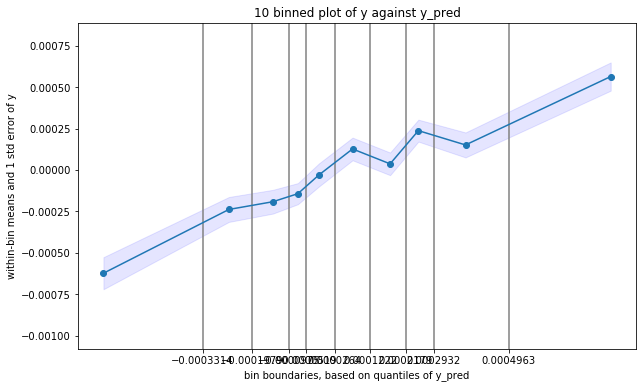

In [33]:
bin_plot(df, 'y_pred', 'y', 10, w_label=None, scale=1)